# <span style="color:red"> Numerical Simulation Laboratory </span>
## <span style="color:orange">  Numerical exercises 12: Samuele Voltan's notebook.</span>

In [12]:
# LIBRARIES
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from PIL import Image

### <span style="color:red">Exercise 12.1

By keeping fixed all the other parameters, try to use at least two other optimizers, different from SGD. Watch to accuracy and loss for training and validation data and comment on the performances.

### <span style="color:orange"> Solution

In [2]:
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

img_rows, img_cols = 28, 28 # number of pixels 
num_classes = 10 # 10 digits

I reshape the images to 28x28 vectors and rescale them to the $[0, 1]$ interval.

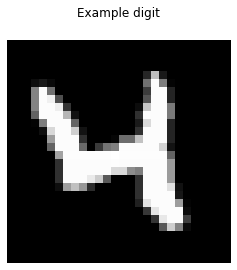

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# Express labels in categorical notation
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

# look at an example of data point
plt.matshow(X_train[20, :].reshape(img_rows, img_cols), cmap='gray')
plt.title("Example digit")
plt.axis("off")
plt.show()

In [4]:
def create_DNN(optimizer):
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['acc'])
    return model

In [5]:
class PrintEpoch(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(".", end="")
    def on_train_end(self, logs=None):
        print()
        

def fit(name, optimizer):
    batch_size = 32
    epochs = 5
    print("Fit with", name, end="")
    return create_DNN(optimizer).fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs, callbacks=[PrintEpoch()],
          verbose=0, validation_data=(X_test, Y_test))

history = {
    "SGD": fit("SGD", SGD()),
    "Adam": fit("Adam", Adam()),
    "RMSprop": fit("RMSprop", RMSprop()),
    "Adagrad": fit("Adagrad", Adagrad()),
    "Adadelta": fit("Adadelta", Adadelta()),
    "Adam": fit("Adam", Adam()),
    "Adamax": fit("Adamax", Adamax()),
    "Nadam": fit("Nadam", Nadam())
}

Fit with SGD.....
Fit with Adam.....
Fit with RMSprop.....
Fit with Adagrad.....
Fit with Adadelta.....
Fit with Adam.....
Fit with Adamax.....
Fit with Nadam.....


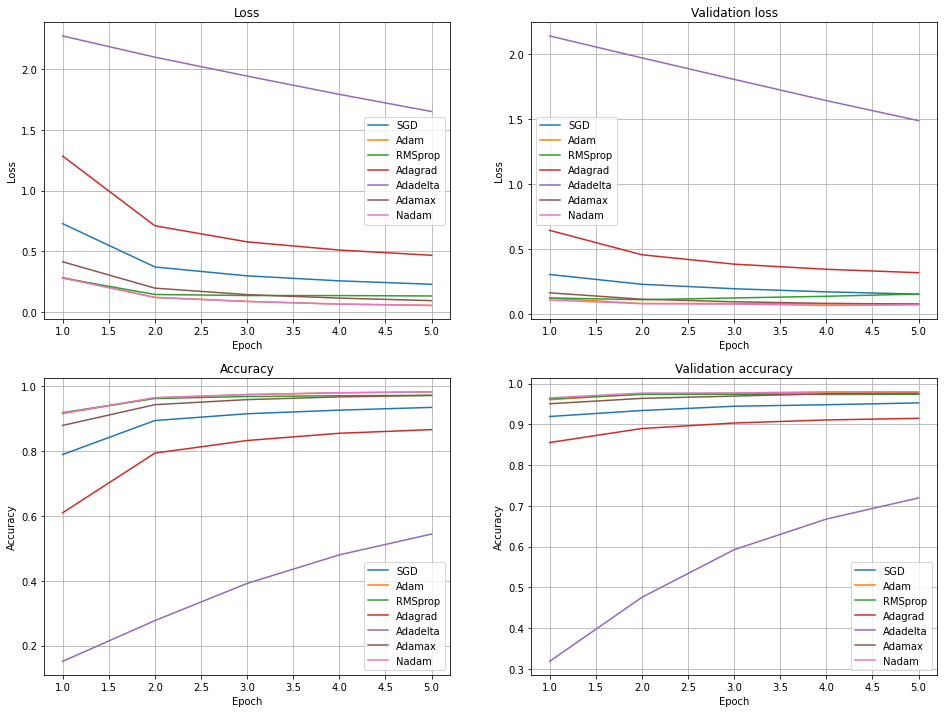

In [6]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.title("Loss")
for op in history:
    plt.plot(range(1, 6), history[op].history["loss"], label=op)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Validation loss")
for op in history:
    plt.plot(range(1, 6), history[op].history["val_loss"], label=op)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 3)
plt.grid(True)
plt.title("Accuracy")
for op in history:
    plt.plot(range(1, 6), history[op].history["acc"], label=op)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2, 2, 4)
plt.grid(True)
plt.title("Validation accuracy")
for op in history:
    plt.plot(range(1, 6), history[op].history["val_acc"], label=op)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### <span style="color:red"> Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end.

### <span style="color:orange"> Solution

In [7]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) / 255
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols) / 255
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) / 255
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1) / 255
    input_shape = (img_rows, img_cols, 1)
    
# Express labels in categorical notation
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [8]:
def create_CNN():
    model = Sequential()
    model.add(Conv2D(num_classes, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Conv2D(num_classes, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='nadam', metrics=['acc'])
    return model

In [9]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 31s 510us/sample - loss: 0.3567 - acc: 0.8876 - val_loss: 0.0984 - val_acc: 0.9710
Epoch 2/5
60000/60000 [==============================] - 34s 573us/sample - loss: 0.1362 - acc: 0.9579 - val_loss: 0.0689 - val_acc: 0.9783
Epoch 3/5
60000/60000 [==============================] - 35s 583us/sample - loss: 0.1061 - acc: 0.9674 - val_loss: 0.0590 - val_acc: 0.9819
Epoch 4/5
60000/60000 [==============================] - 34s 565us/sample - loss: 0.0953 - acc: 0.9705 - val_loss: 0.0519 - val_acc: 0.9822
Epoch 5/5
60000/60000 [==============================] - 31s 518us/sample - loss: 0.0850 - acc: 0.9732 - val_loss: 0.0471 - val_acc: 0.9845


Test loss: 0.04712527369130403
Test accuracy: 0.9845


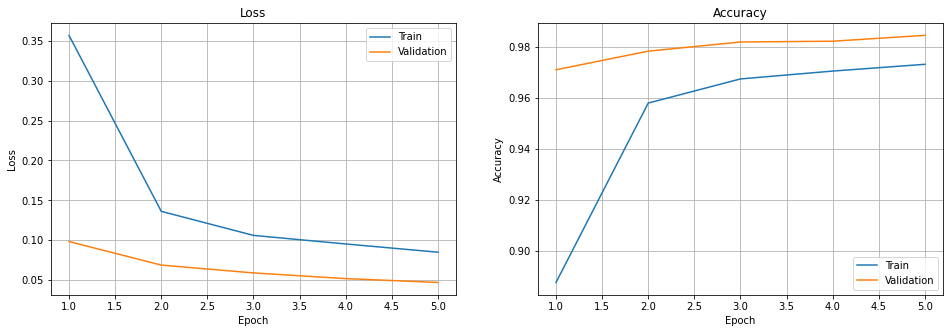

In [10]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.grid(True)
plt.plot(range(1, 6), history.history["loss"], label="Train")
plt.plot(range(1, 6), history.history["val_loss"], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.grid(True)
plt.plot(range(1, 6), history.history["acc"], label="Train")
plt.plot(range(1, 6), history.history["val_acc"], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

### <span style="color:red"> Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

### <span style="color:orange"> Solution

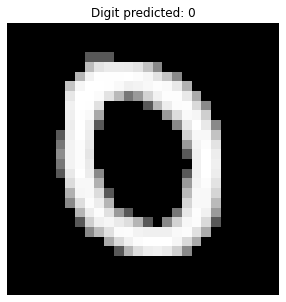

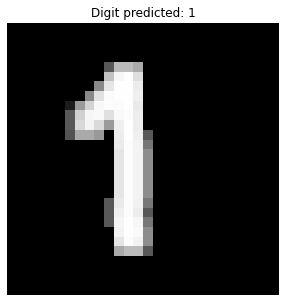

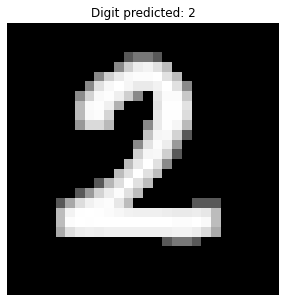

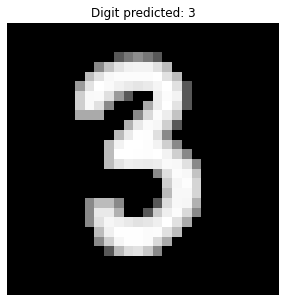

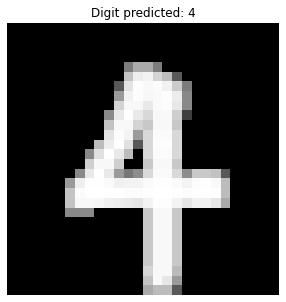

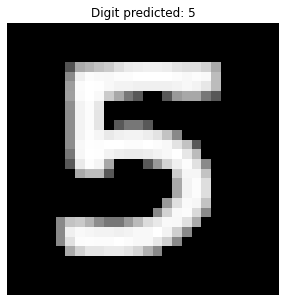

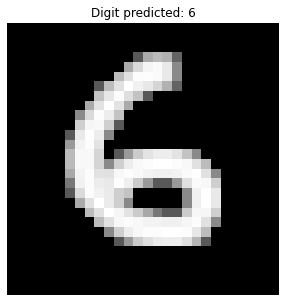

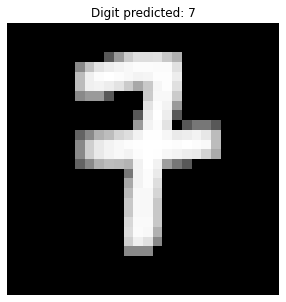

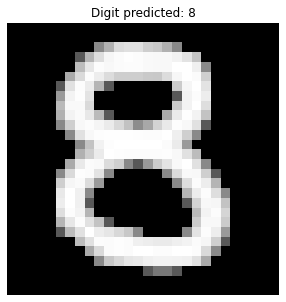

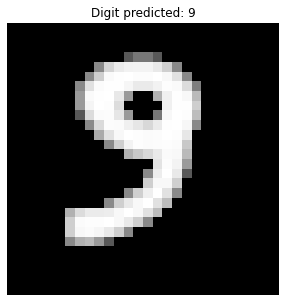

In [14]:
for digit in range(10):
    digit_in = Image.open(f"data/lab12/digits/{digit}.png").convert('L')
    ydim, xdim = digit_in.size
    if (xdim != img_rows or ydim != img_cols):
        raise Exception(f"Wrong image size: {xdim}x{ydim} instead of {img_rows}x{img_cols}")
    pix=digit_in.load();
    
    if keras.backend.image_data_format() == 'channels_first':
        img = np.zeros((1, img_rows, img_cols))
        for j in range(ydim):
            for i in range(xdim):
                img[0, i, j] = pix[j,i]
    else:
        img = np.zeros((img_rows, img_cols, 1))
        for j in range(ydim):
            for i in range(xdim):
                img[i, j, 0] = pix[j,i]
    img /= 255
    pred = model_CNN.predict(img[None])
    plt.figure(figsize=(5, 5))  
    plt.imshow(img, cmap='gray')    
    plt.title(f"Digit predicted: {np.argmax(pred)}")
    plt.axis('off') 
    plt.show()


The NN predicts all 9 digits